In [118]:
# Importando os pacotes necessários
import py_dss_interface
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Carregando e tratando os dados de carga - Região Sudeste - 01/01/2020 até 31/12/2021

#lendo o arquivo
base_carga = pd.read_csv("C:\Projeto_Final\Base_Carga\Simples_Geração_de_Energia_Dia_data.csv",";")
#deslocando a primeira linha (dados vazios)
base_carga = base_carga.iloc[1:]
#removendo colunas que não iremos usar
base_carga.drop(["cod_aneel (tb_referenciacegusina (Usina))","cod_nucleoaneel (tb_referenciacegusina (Usina))","Data Dica","dsc_estado","nom_tipousinasite","nom_usina2","Período Exibido GE","id_subsistema"],axis = 1, inplace = True)
#renomeando as colunas
base_carga.rename(columns = {'Data Escala de Tempo 1 GE Simp 4':'Data/Hora', 'Selecione Tipo de GE Simp 4':'Carga'}, inplace = True)  
#alterando os tipos de dados das colunas e criando colunas de Hora, Data, Dia da Semana
base_carga['Data/Hora'] = pd.to_datetime(base_carga['Data/Hora'])
base_carga['Data'] = base_carga['Data/Hora'].dt.strftime('%d-%m-%Y')
base_carga['Hora'] = base_carga['Data/Hora'].dt.strftime('%H:%M:%S')
base_carga['Dia da Semana'] = base_carga['Data/Hora'].dt.strftime('%A')
base_carga['Data Hora'] = base_carga['Data/Hora'].dt.strftime('%d-%m-%Y %H:%M:%S')
base_carga['Mês'] = base_carga['Data/Hora'].dt.strftime('%m')
#mudando o tipo de dados para "float"
base_carga['Carga'] = base_carga['Carga'].str.replace(',','.').astype(float)
#dicionários para passar pro Português os dias da semana e definir os dias úteis
dias_da_semana = {'Sunday':'Domingo','Monday':'Segunda-Feira','Tuesday':'Terça-Feira','Wednesday':'Quarta-Feira','Thursday':'Quinta-Feira','Friday':'Sexta-Feira','Saturday':'Sábado'}
dias_uteis = {'Domingo':'Não Útil','Segunda-Feira':'Útil','Terça-Feira':'Útil','Quarta-Feira':'Útil','Quinta-Feira':'Útil','Sexta-Feira':'Útil','Sábado':'Não Útil'}
#adicionando as colunas de dias úteis e dias da semana em português
base_carga['Dia da Semana'] = base_carga['Dia da Semana'].replace(dias_da_semana)
base_carga['Dia Útil'] = base_carga['Dia da Semana'].replace(dias_uteis)
base_carga['Carga_pu'] = np.divide(base_carga['Carga'],base_carga['Carga'].max())
#reordenando as colunas
base_carga = base_carga[['Data/Hora','Data','Hora','Data Hora','Mês','Dia da Semana','Dia Útil','Carga','Carga_pu']]

#exportando dados tratados para excel e csv
base_carga.to_excel("C:\Projeto_Final\Base_Carga\Dados_de_Carga.xlsx",index=False)
base_carga.to_csv("C:\Projeto_Final\Base_Carga\Dados_de_Carga.csv",index=False)

#Agrupando os dados por mês e hora para conseguir máx, mín, média e mediana dos
#valores de carga hora a hora de cada mês separados por dias úteis e não úteis
base_ = base_carga.groupby(['Mês','Hora','Dia Útil'])['Carga'].agg(['max','min','mean','median'])
base_['CargaMédia_pu'] = np.divide(base_['mean'],base_carga['Carga'].max())


C:\Users\gusta\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [122]:
# Valores para janeiro
jan = base_.loc[('01')]
jan_u = jan[jan.index.isin(['Útil'], level=1)]
jan_u = jan_u.reset_index(level="Hora")
jan_nu = jan[jan.index.isin(['Não Útil'], level=1)]
jan_nu = jan_nu.reset_index(level="Hora")
loadshape_jan_u = jan_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_jan_nu = jan_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para fevereiro
fev = base_.loc[('02')]
fev_u = fev[fev.index.isin(['Útil'], level=1)]
fev_u = fev_u.reset_index(level="Hora")
fev_nu = fev[fev.index.isin(['Não Útil'], level=1)]
fev_nu = fev_nu.reset_index(level="Hora")
loadshape_fev_u = fev_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_fev_nu = fev_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para março
mar = base_.loc[('03')]
mar_u = mar[mar.index.isin(['Útil'], level=1)]
mar_u = mar_u.reset_index(level="Hora")
mar_nu = mar[mar.index.isin(['Não Útil'], level=1)]
mar_nu = mar_nu.reset_index(level="Hora")
loadshape_mar_u = mar_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_mar_nu = mar_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para abril
abr = base_.loc[('04')]
abr_u = abr[abr.index.isin(['Útil'], level=1)]
abr_u = abr_u.reset_index(level="Hora")
abr_nu = abr[abr.index.isin(['Não Útil'], level=1)]
abr_nu = abr_nu.reset_index(level="Hora")
loadshape_abr_u = abr_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_abr_nu = abr_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para maio
mai = base_.loc[('05')]
mai_u = mai[mai.index.isin(['Útil'], level=1)]
mai_u = mai_u.reset_index(level="Hora")
mai_nu = mai[mai.index.isin(['Não Útil'], level=1)]
mai_nu = mai_nu.reset_index(level="Hora")
loadshape_mai_u = mai_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_mai_nu = mai_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para junho
jun = base_.loc[('06')]
jun_u = jun[jun.index.isin(['Útil'], level=1)]
jun_u = jun_u.reset_index(level="Hora")
jun_nu = jun[jun.index.isin(['Não Útil'], level=1)]
jun_nu = jun_nu.reset_index(level="Hora")
loadshape_jun_u = jun_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_jun_nu = jun_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para julho
jul = base_.loc[('07')]
jul_u = jul[jul.index.isin(['Útil'], level=1)]
jul_u = jul_u.reset_index(level="Hora")
jul_nu = jul[jul.index.isin(['Não Útil'], level=1)]
jul_nu = jul_nu.reset_index(level="Hora")
loadshape_jul_u = jul_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_jul_nu = jul_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para agosto
ago = base_.loc[('08')]
ago_u = ago[ago.index.isin(['Útil'], level=1)]
ago_u = ago_u.reset_index(level="Hora")
ago_nu = ago[ago.index.isin(['Não Útil'], level=1)]
ago_nu = ago_nu.reset_index(level="Hora")
loadshape_ago_u = ago_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_ago_nu = ago_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para setembro
set = base_.loc[('09')]
set_u = set[set.index.isin(['Útil'], level=1)]
set_u = set_u.reset_index(level="Hora")
set_nu = set[set.index.isin(['Não Útil'], level=1)]
set_nu = set_nu.reset_index(level="Hora")
loadshape_set_u = set_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_set_nu = set_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para Outubro
out = base_.loc[('10')]
out_u = out[out.index.isin(['Útil'], level=1)]
out_u = out_u.reset_index(level="Hora")
out_nu = out[out.index.isin(['Não Útil'], level=1)]
out_nu = out_nu.reset_index(level="Hora")
loadshape_out_u = out_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_out_nu = out_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para Novembro
nov = base_.loc[('11')]
nov_u = nov[nov.index.isin(['Útil'], level=1)]
nov_u = nov_u.reset_index(level="Hora")
nov_nu = nov[nov.index.isin(['Não Útil'], level=1)]
nov_nu = nov_nu.reset_index(level="Hora")
loadshape_nov_u = nov_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_nov_nu = nov_nu['CargaMédia_pu'].reset_index(drop=True)
# Valores para Dezembro
dez = base_.loc[('12')]
dez_u = dez[dez.index.isin(['Útil'], level=1)]
dez_u = dez_u.reset_index(level="Hora")
dez_nu = dez[dez.index.isin(['Não Útil'], level=1)]
dez_nu = dez_nu.reset_index(level="Hora")
loadshape_dez_u = dez_u['CargaMédia_pu'].reset_index(drop=True)
loadshape_dez_nu = dez_nu['CargaMédia_pu'].reset_index(drop=True)

In [112]:
base_carga.describe(percentiles = [0.35, 0.5, 0.85])

,Carga
count,17521.000000
mean,34749.930547
std,5356.346238
min,21970.739000
35%,32343.732000
50%,34728.739000
85%,40374.428000
max,52261.787000


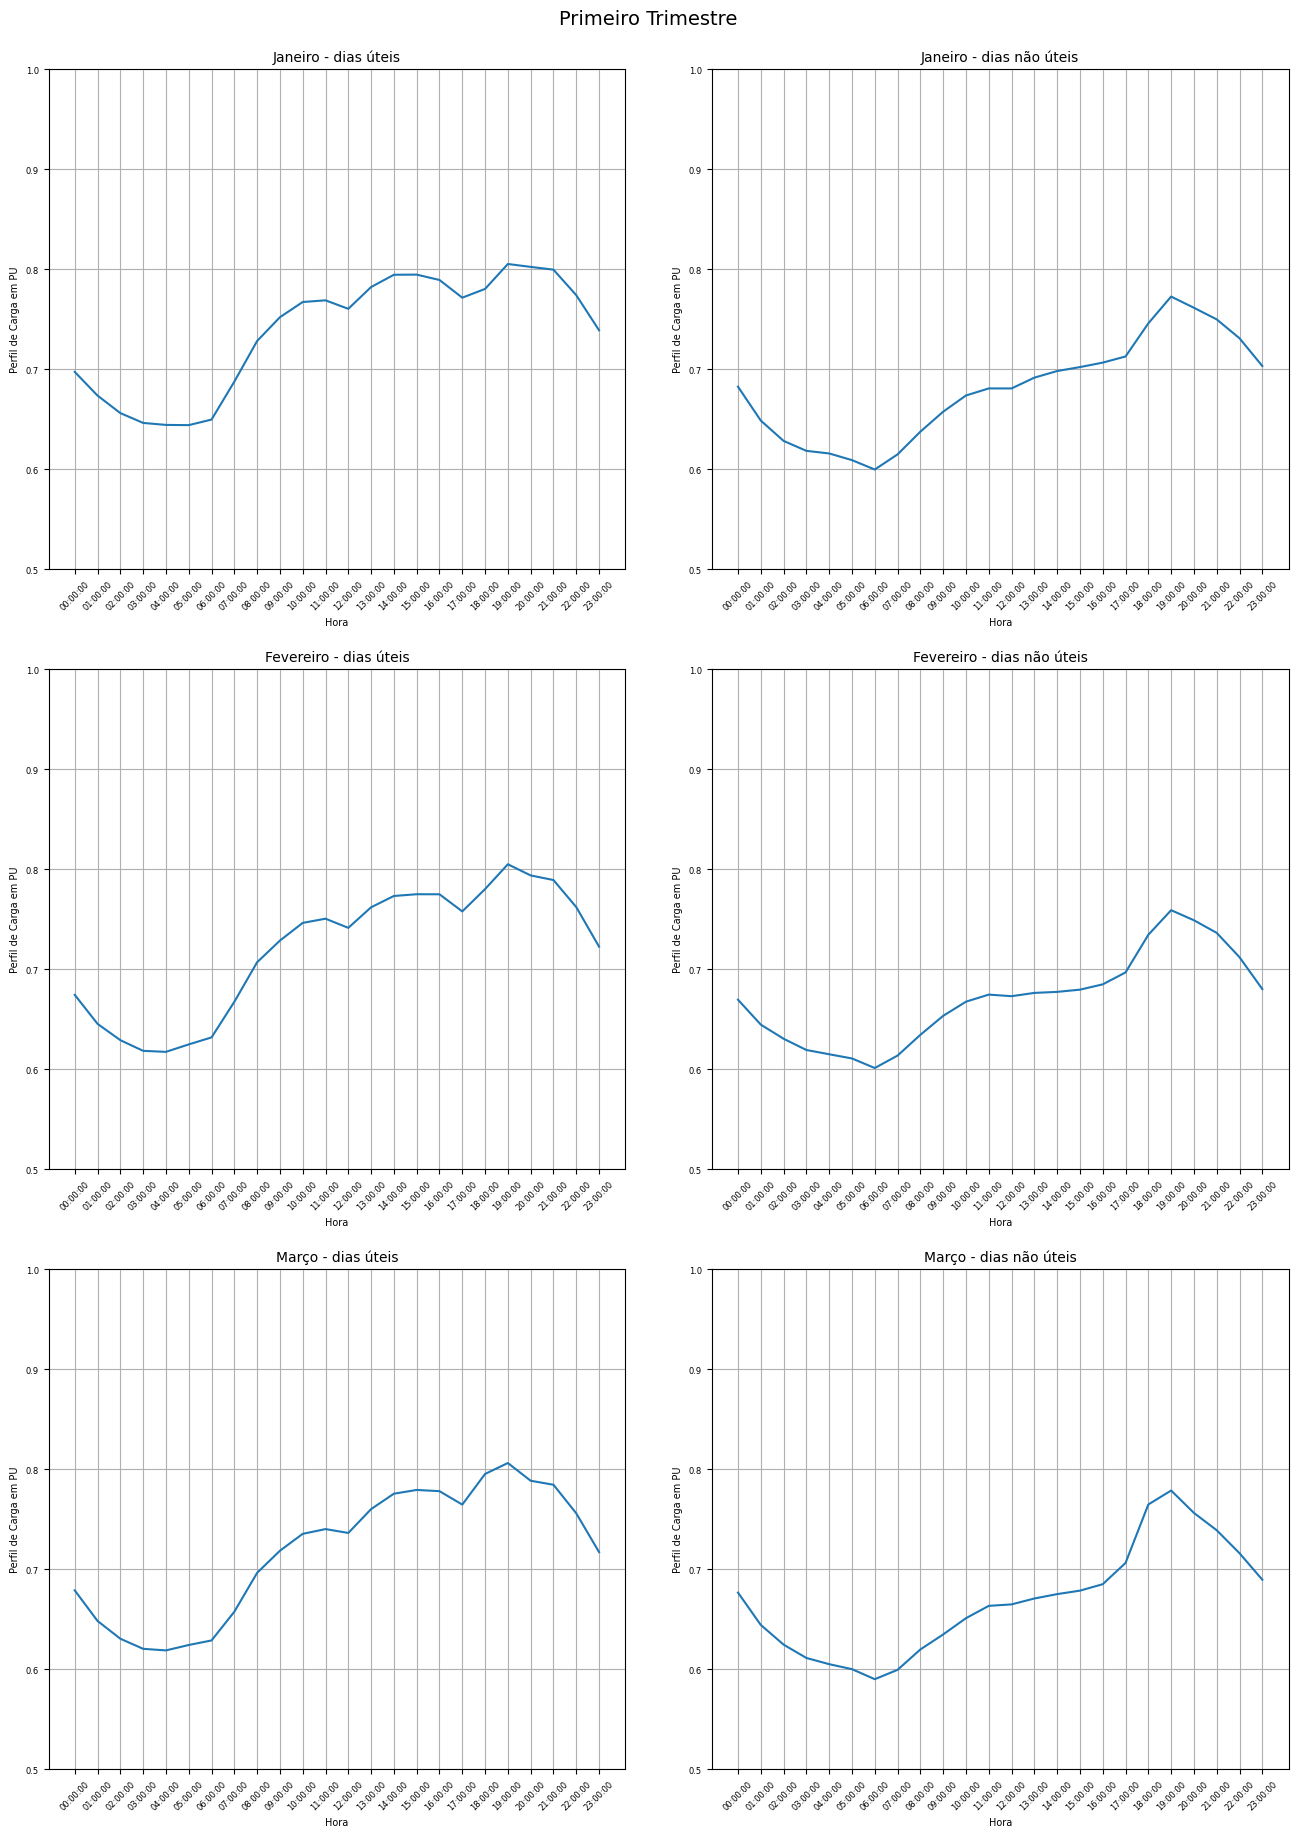

In [126]:
# Primeiro Trimestre - Perfil de Carga

plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.plot(jan_u['Hora'],jan_u['CargaMédia_pu'])
plt.title('Janeiro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 2)
plt.plot(jan_nu['Hora'],jan_nu['CargaMédia_pu'])
plt.title('Janeiro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 3)
plt.plot(fev_u['Hora'],fev_u['CargaMédia_pu'])
plt.title('Fevereiro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 4)
plt.plot(fev_nu['Hora'],fev_nu['CargaMédia_pu'])
plt.title('Fevereiro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 5)
plt.plot(mar_u['Hora'],mar_u['CargaMédia_pu'])
plt.title('Março - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 6)
plt.plot(mar_nu['Hora'],mar_nu['CargaMédia_pu'])
plt.title('Março - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.suptitle("Primeiro Trimestre", fontsize = 14)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.95, wspace=0.15, hspace=0.2)

plt.show()

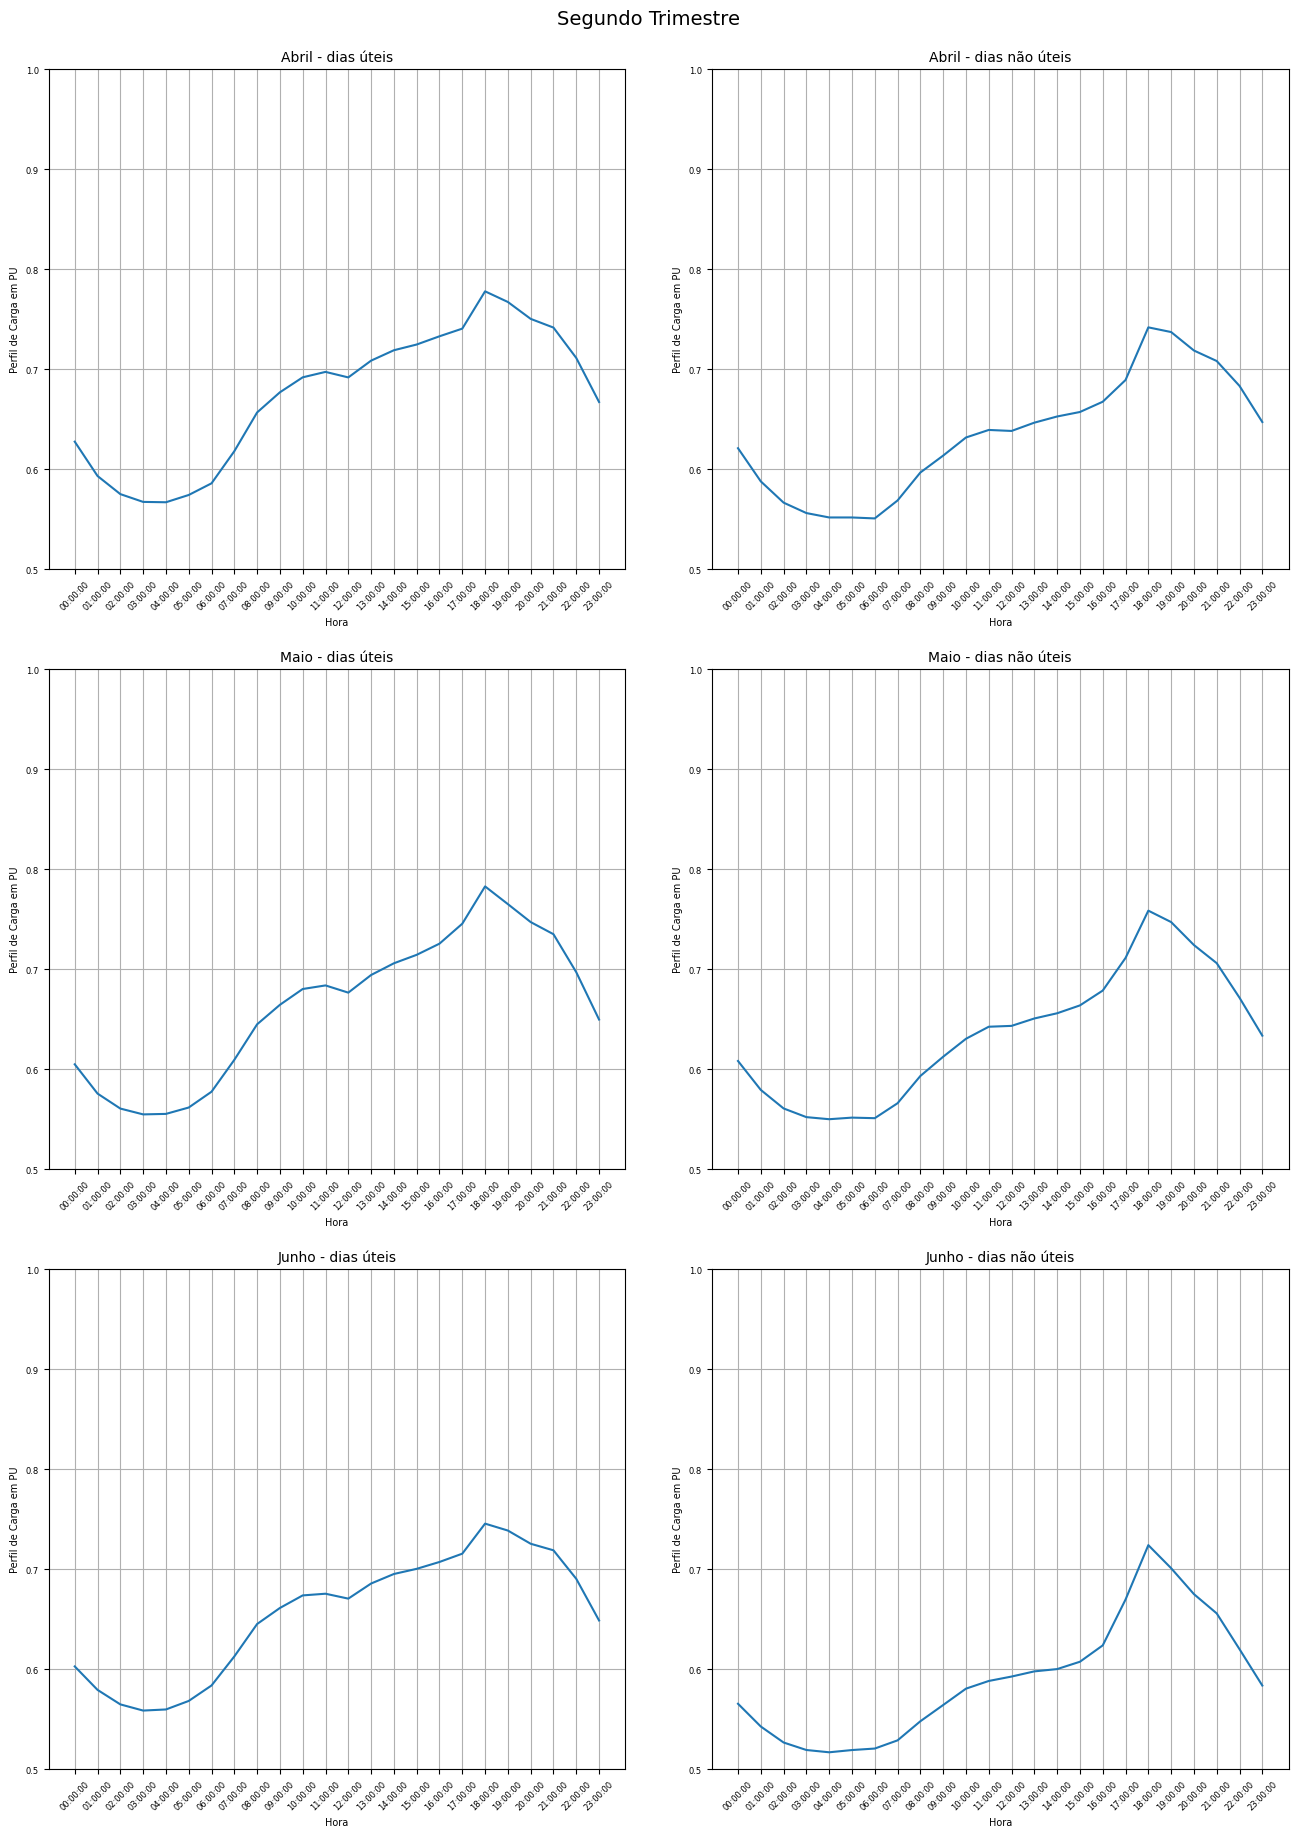

In [127]:
# Segundo Trimestre - Perfil de Carga
plt.figure(figsize=(16, 20))

plt.subplot(3, 2, 1)
plt.plot(abr_u['Hora'],abr_u['CargaMédia_pu'])
plt.title('Abril - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 2)
plt.plot(abr_nu['Hora'],abr_nu['CargaMédia_pu'])
plt.title('Abril - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.5, 1)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 3)
plt.plot(mai_u['Hora'],mai_u['CargaMédia_pu'])
plt.title('Maio - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 4)
plt.plot(mai_nu['Hora'],mai_nu['CargaMédia_pu'])
plt.title('Maio - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 5)
plt.plot(jun_u['Hora'],jun_u['CargaMédia_pu'])
plt.title('Junho - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 6)
plt.plot(jun_nu['Hora'],jun_nu['CargaMédia_pu'])
plt.title('Junho - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})
plt.suptitle("Segundo Trimestre", fontsize = 14)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.95, wspace=0.15, hspace=0.2)

plt.show()

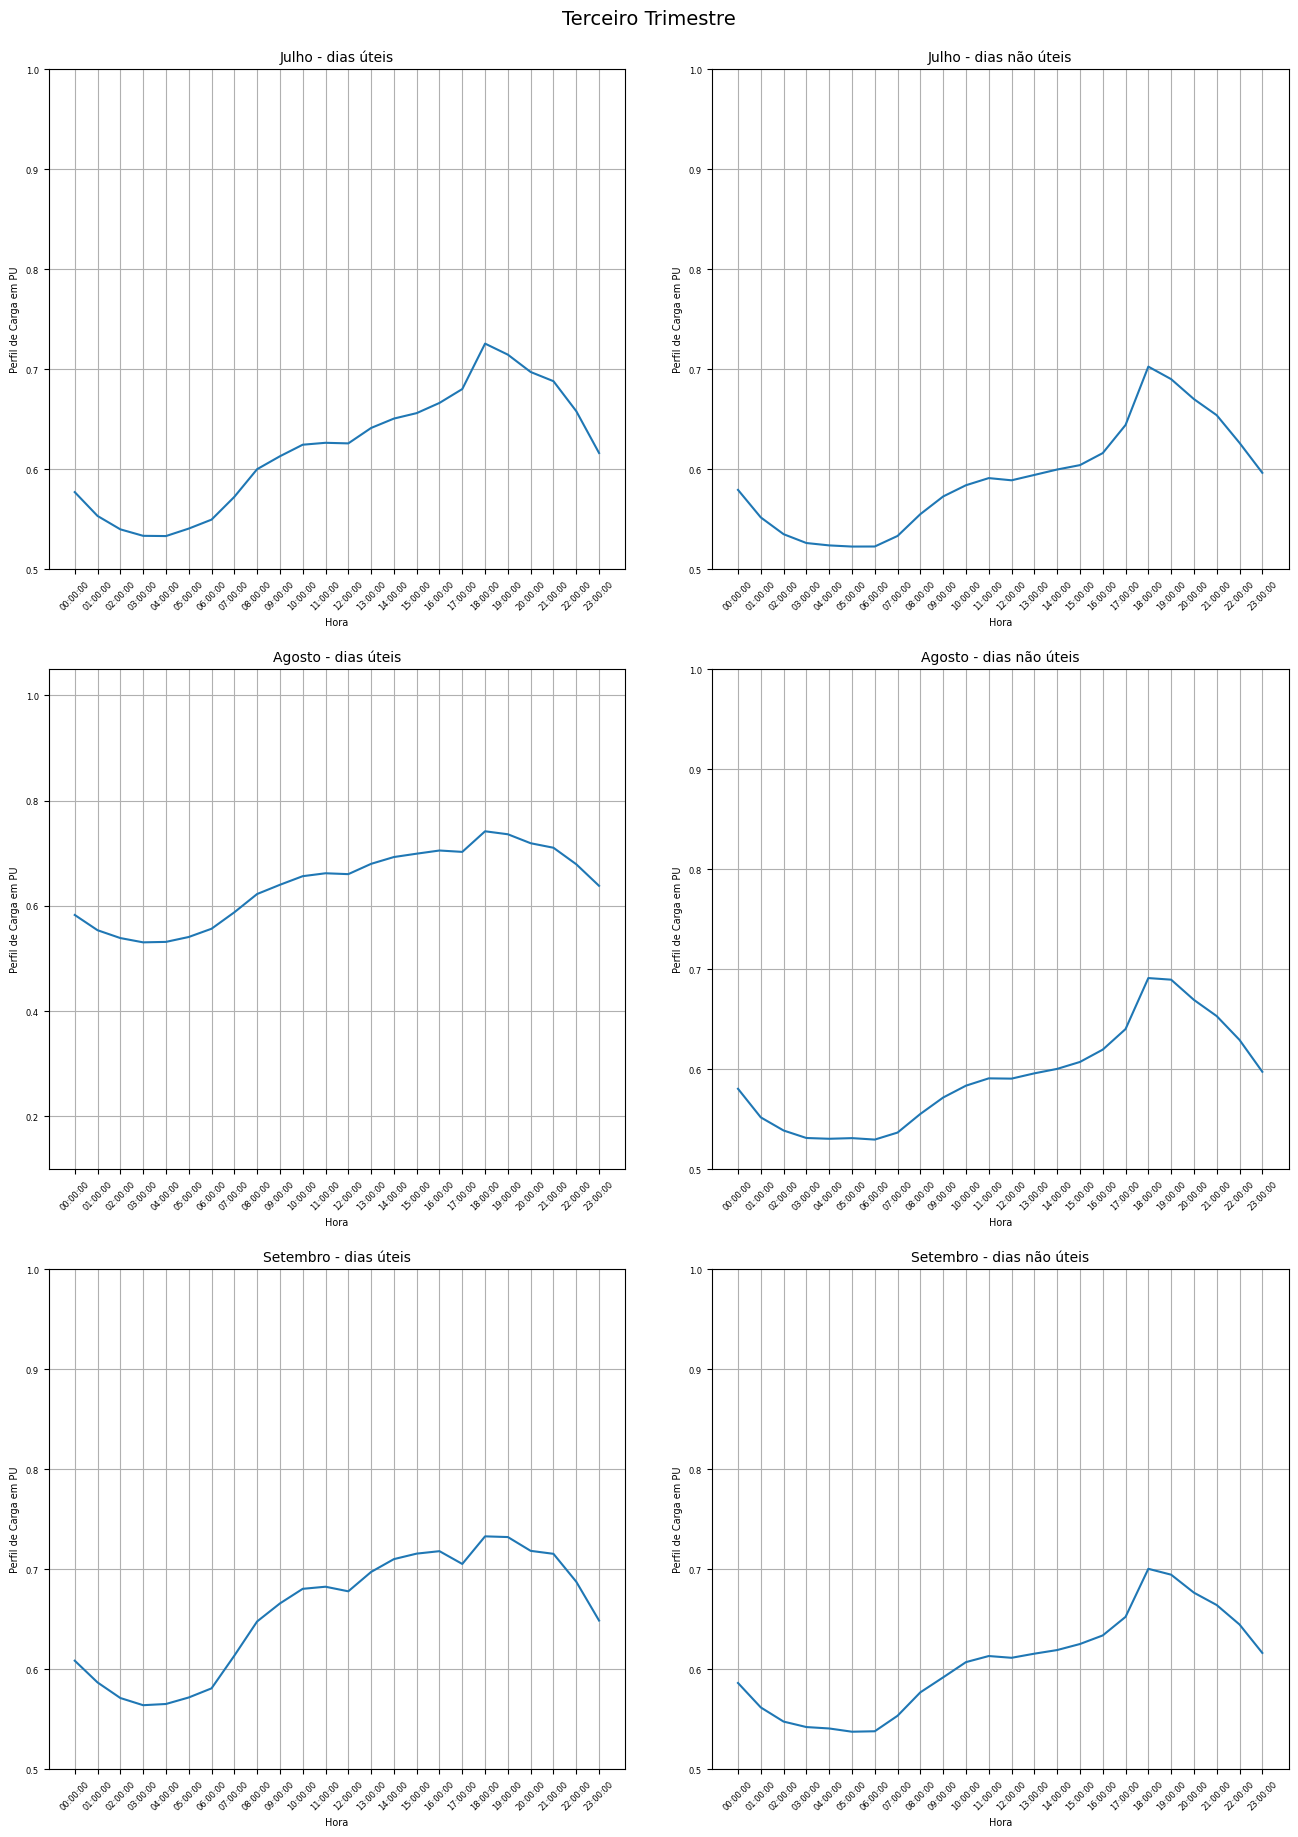

In [128]:
# Terceiro Trimestre - Perfil de Carga
plt.figure(figsize=(16, 20))

plt.subplot(3, 2, 1)
plt.plot(jul_u['Hora'],jul_u['CargaMédia_pu'])
plt.title('Julho - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 2)
plt.plot(jul_nu['Hora'],jul_nu['CargaMédia_pu'])
plt.title('Julho - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 3)
plt.plot(ago_u['Hora'],ago_u['CargaMédia_pu'])
plt.title('Agosto - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.10, 1.05)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 4)
plt.plot(ago_nu['Hora'],ago_nu['CargaMédia_pu'])
plt.title('Agosto - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 5)
plt.plot(set_u['Hora'],set_u['CargaMédia_pu'])
plt.title('Setembro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 6)
plt.plot(set_nu['Hora'],set_nu['CargaMédia_pu'])
plt.title('Setembro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})
plt.suptitle("Terceiro Trimestre", fontsize = 14)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.95, wspace=0.15, hspace=0.2)

plt.show()

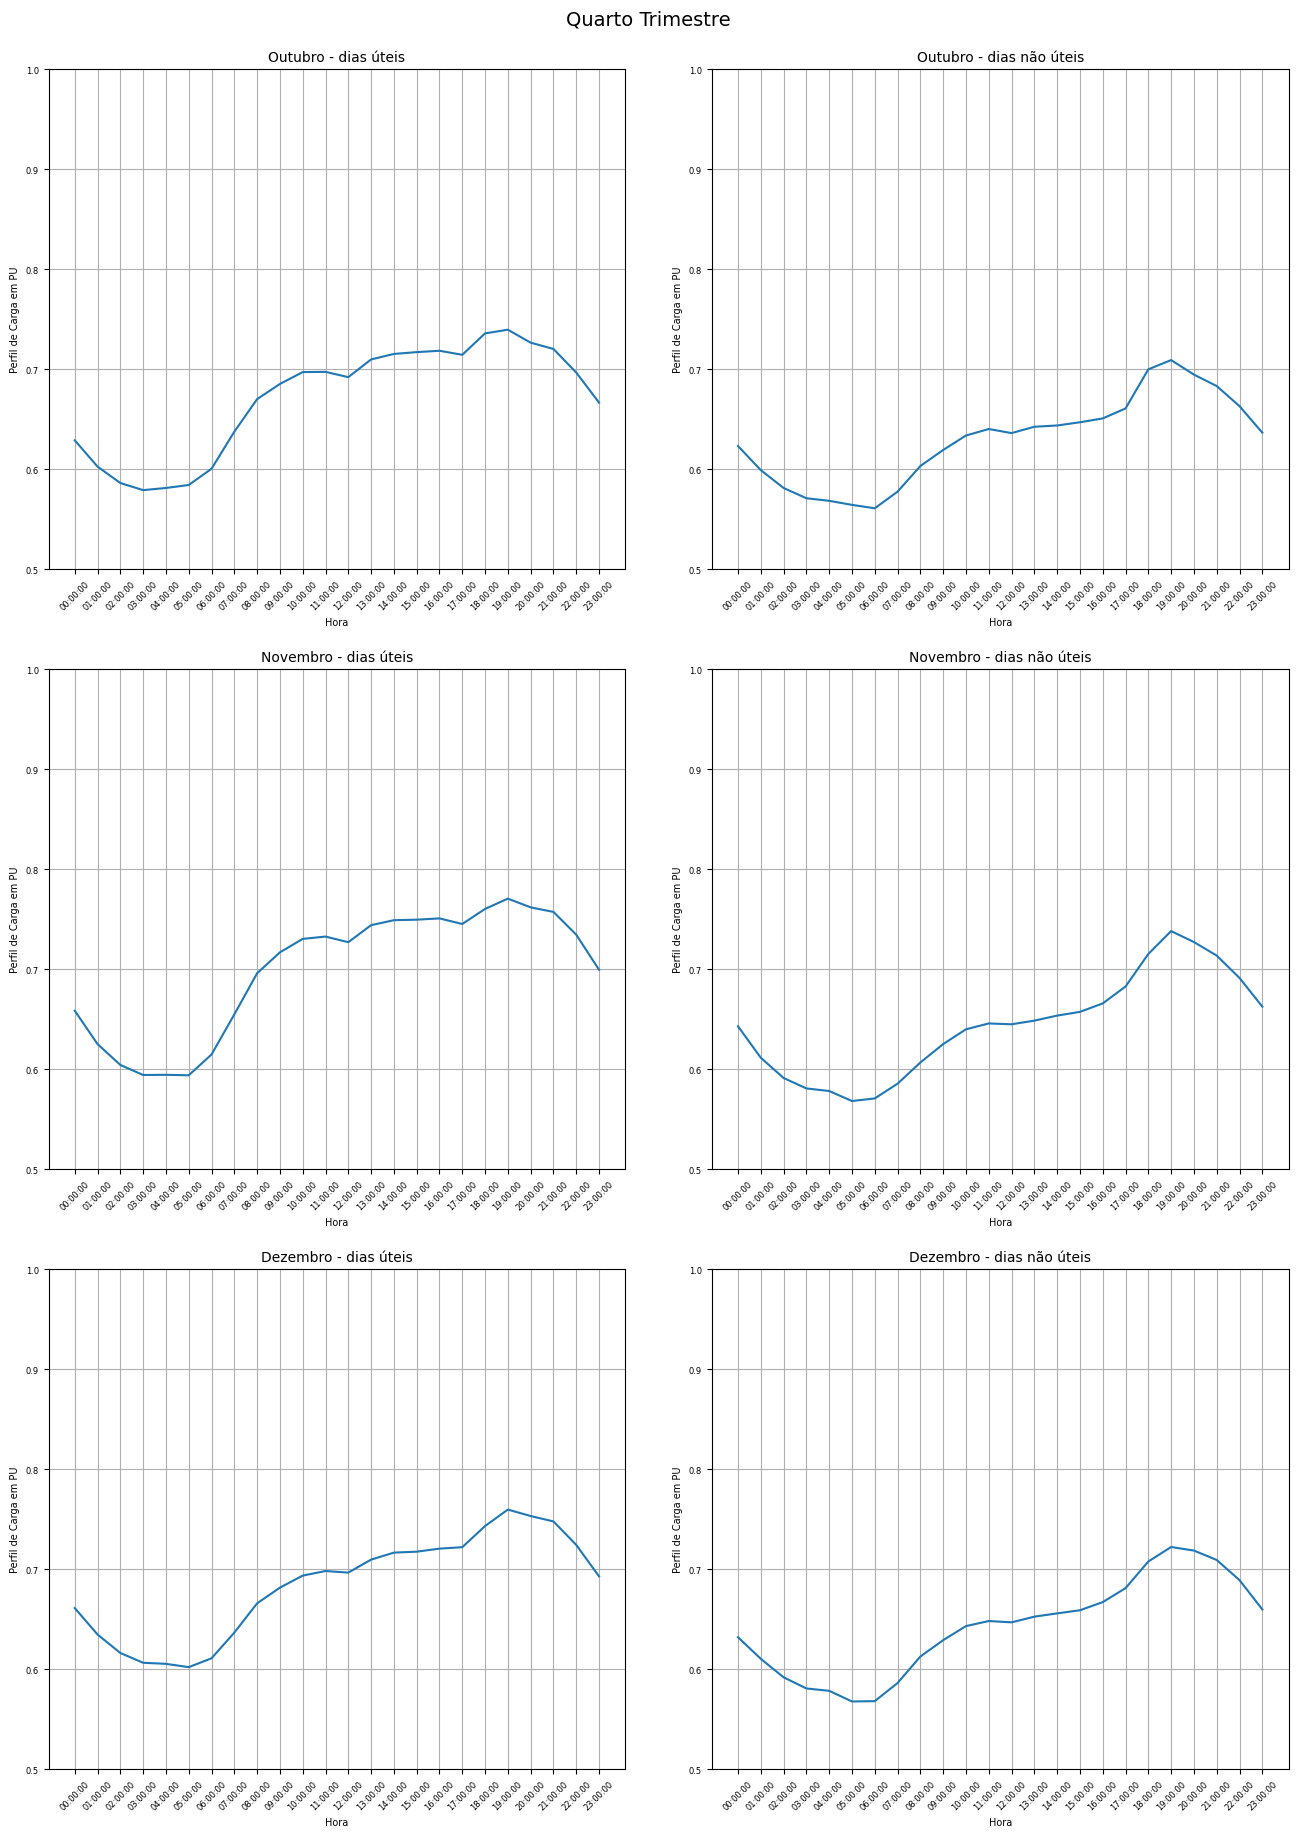

In [130]:
# Quarto Trimestre - Perfil de Carga
plt.figure(figsize=(16, 20))

plt.subplot(3, 2, 1)
plt.plot(out_u['Hora'],out_u['CargaMédia_pu'])
plt.title('Outubro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 2)
plt.plot(out_nu['Hora'],out_nu['CargaMédia_pu'])
plt.title('Outubro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 3)
plt.plot(nov_u['Hora'],nov_u['CargaMédia_pu'])
plt.title('Novembro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 4)
plt.plot(nov_nu['Hora'],nov_nu['CargaMédia_pu'])
plt.title('Novembro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 5)
plt.plot(dez_u['Hora'],dez_u['CargaMédia_pu'])
plt.title('Dezembro - dias úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})

plt.subplot(3, 2, 6)
plt.plot(dez_nu['Hora'],dez_nu['CargaMédia_pu'])
plt.title('Dezembro - dias não úteis', fontsize = 'medium')
plt.grid(True)
plt.ylim(0.50, 1.0)
plt.xlabel('Hora')
plt.ylabel('Perfil de Carga em PU')
plt.xticks(rotation=45)
plt.rcParams.update({
    "axes.labelsize": 7,
    "font.size": 10,
    "legend.fontsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6
})
plt.suptitle("Quarto Trimestre", fontsize = 14)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.95, wspace=0.15, hspace=0.2)
plt.show()